#**Data Preparation**

##**Data Exploration**

In [169]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv('ispu.csv')
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69,22,15,18,27,69,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
750,2021-05-27,DKI5 (Kebon Jeruk) Jakarta Barat,34,61,32,5,20,11,61,PM25,SEDANG
751,2021-05-28,DKI5 (Kebon Jeruk) Jakarta Barat,49,77,37,8,20,19,77,PM25,SEDANG
752,2021-05-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,88,37,11,19,29,88,PM25,SEDANG
753,2021-05-30,DKI5 (Kebon Jeruk) Jakarta Barat,46,66,24,15,18,29,66,PM25,SEDANG


In [171]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69,22,15,18,27,69,PM25,SEDANG


In [172]:
df.dtypes

tanggal     object
stasiun     object
pm10        object
pm25        object
so2         object
co          object
o3          object
no2         object
max          int64
critical    object
categori    object
dtype: object

In [173]:
df.shape

(755, 11)

In [174]:
df.describe(include='all')

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
count,755,755,755,693,755,755,755,755,755.000000,748,755
unique,151,5,71,103,59,38,75,44,NaN,5,4
top,2021-03-09,DKI5 (Kebon Jeruk) Jakarta Barat,51,77,24,10,---,13,NaN,PM25,SEDANG
freq,5,151,35,22,40,70,31,42,NaN,625,558
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.607947,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.147203,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.000000,NaN,NaN


In [175]:
df.groupby('categori').size()

categori
BAIK              125
SEDANG            558
TIDAK ADA DATA      7
TIDAK SEHAT        65
dtype: int64

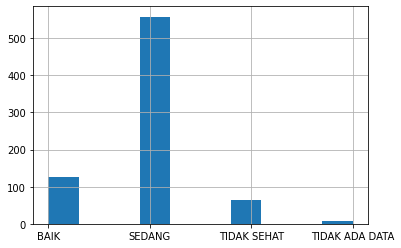

In [176]:
df['categori'].hist()

##**Data Missing**

In [177]:
#cek missing value

df.isna().sum()

tanggal      0
stasiun      0
pm10         0
pm25        62
so2          0
co           0
o3           0
no2          0
max          0
critical     7
categori     0
dtype: int64

In [178]:
df = df.dropna()

In [179]:
df.groupby("categori").size()
df.isnull().sum()

tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [180]:
df.dtypes

tanggal     object
stasiun     object
pm10        object
pm25        object
so2         object
co          object
o3          object
no2         object
max          int64
critical    object
categori    object
dtype: object

In [181]:
df["pm10"].value_counts()

51     33
52     27
54     25
55     25
---    23
       ..
20      1
16      1
84      1
89      1
18      1
Name: pm10, Length: 69, dtype: int64

In [182]:
df[df["pm10"]=="---"].index

Int64Index([ 48,  71,  78, 263, 266, 267, 268, 269, 270, 362, 363, 579, 580,
            672, 673, 674, 675, 676, 677, 678, 679, 680, 681],
           dtype='int64')

In [183]:
df=df.drop(df[df["no2"]=="---"].index)
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69,22,15,18,27,69,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
750,2021-05-27,DKI5 (Kebon Jeruk) Jakarta Barat,34,61,32,5,20,11,61,PM25,SEDANG
751,2021-05-28,DKI5 (Kebon Jeruk) Jakarta Barat,49,77,37,8,20,19,77,PM25,SEDANG
752,2021-05-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,88,37,11,19,29,88,PM25,SEDANG
753,2021-05-30,DKI5 (Kebon Jeruk) Jakarta Barat,46,66,24,15,18,29,66,PM25,SEDANG


In [184]:
df=df.drop(df[df["o3"]=="---"].index)
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69,22,15,18,27,69,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
750,2021-05-27,DKI5 (Kebon Jeruk) Jakarta Barat,34,61,32,5,20,11,61,PM25,SEDANG
751,2021-05-28,DKI5 (Kebon Jeruk) Jakarta Barat,49,77,37,8,20,19,77,PM25,SEDANG
752,2021-05-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,88,37,11,19,29,88,PM25,SEDANG
753,2021-05-30,DKI5 (Kebon Jeruk) Jakarta Barat,46,66,24,15,18,29,66,PM25,SEDANG


In [185]:
df=df.drop(df[df["co"]=="---"].index)
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69,22,15,18,27,69,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
750,2021-05-27,DKI5 (Kebon Jeruk) Jakarta Barat,34,61,32,5,20,11,61,PM25,SEDANG
751,2021-05-28,DKI5 (Kebon Jeruk) Jakarta Barat,49,77,37,8,20,19,77,PM25,SEDANG
752,2021-05-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,88,37,11,19,29,88,PM25,SEDANG
753,2021-05-30,DKI5 (Kebon Jeruk) Jakarta Barat,46,66,24,15,18,29,66,PM25,SEDANG


In [186]:
df=df.drop(df[df["so2"]=="---"].index)
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69,22,15,18,27,69,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
750,2021-05-27,DKI5 (Kebon Jeruk) Jakarta Barat,34,61,32,5,20,11,61,PM25,SEDANG
751,2021-05-28,DKI5 (Kebon Jeruk) Jakarta Barat,49,77,37,8,20,19,77,PM25,SEDANG
752,2021-05-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,88,37,11,19,29,88,PM25,SEDANG
753,2021-05-30,DKI5 (Kebon Jeruk) Jakarta Barat,46,66,24,15,18,29,66,PM25,SEDANG


In [187]:
df=df.drop(df[df["pm25"]=="---"].index)
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69,22,15,18,27,69,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
750,2021-05-27,DKI5 (Kebon Jeruk) Jakarta Barat,34,61,32,5,20,11,61,PM25,SEDANG
751,2021-05-28,DKI5 (Kebon Jeruk) Jakarta Barat,49,77,37,8,20,19,77,PM25,SEDANG
752,2021-05-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,88,37,11,19,29,88,PM25,SEDANG
753,2021-05-30,DKI5 (Kebon Jeruk) Jakarta Barat,46,66,24,15,18,29,66,PM25,SEDANG


In [188]:
df=df.drop(df[df["pm10"]=="---"].index)
df.dtypes

tanggal     object
stasiun     object
pm10        object
pm25        object
so2         object
co          object
o3          object
no2         object
max          int64
critical    object
categori    object
dtype: object

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 754
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   615 non-null    object
 1   stasiun   615 non-null    object
 2   pm10      615 non-null    object
 3   pm25      615 non-null    object
 4   so2       615 non-null    object
 5   co        615 non-null    object
 6   o3        615 non-null    object
 7   no2       615 non-null    object
 8   max       615 non-null    int64 
 9   critical  615 non-null    object
 10  categori  615 non-null    object
dtypes: int64(1), object(10)
memory usage: 57.7+ KB


In [190]:
df = df.astype({"tanggal": object, "stasiun": object,"pm10":int,"pm25":int,"so2":int,"co":int,"o3":int,"no2":int,"max":int,"critical":object,"categori":object})
df.dtypes

tanggal     object
stasiun     object
pm10         int64
pm25         int64
so2          int64
co           int64
o3           int64
no2          int64
max          int64
critical    object
categori    object
dtype: object

##**Data Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

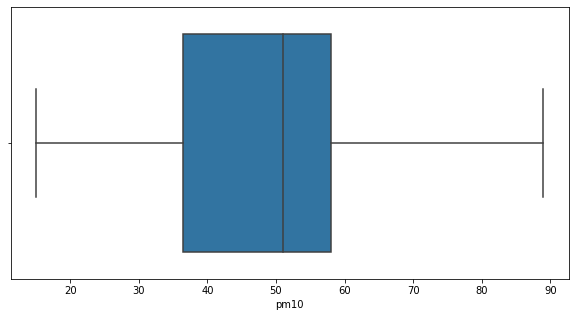

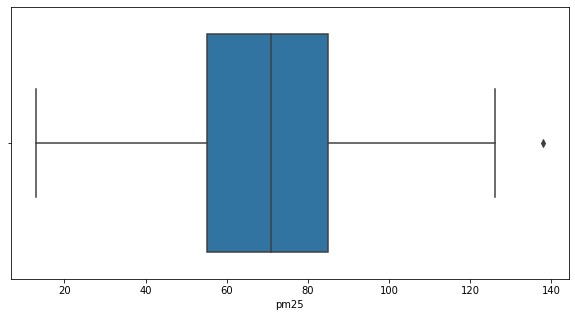

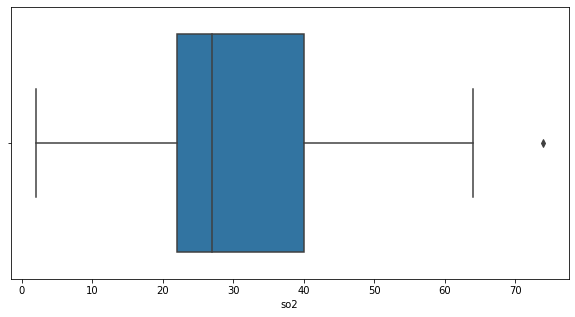

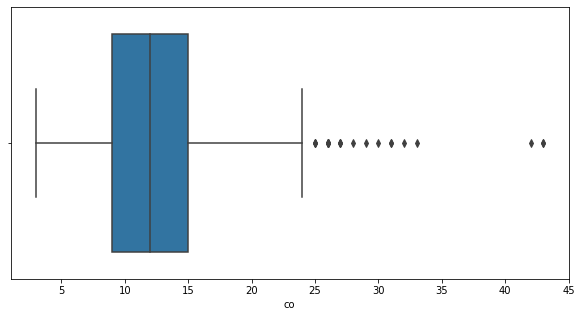

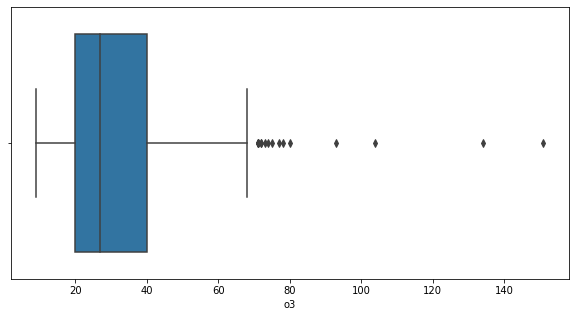

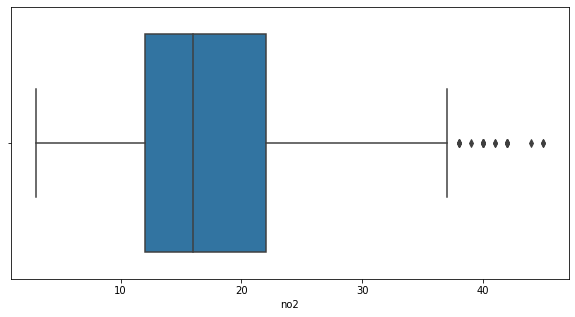

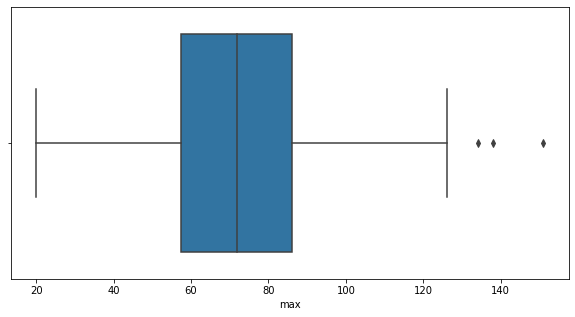

In [191]:
plt.figure(figsize = (10, 5))
sns.boxplot(df["pm10"])
plt.figure(figsize = (10, 5))
sns.boxplot(df["pm25"])
plt.figure(figsize = (10, 5))
sns.boxplot(df["so2"])
plt.figure(figsize = (10, 5))
sns.boxplot(df["co"])
plt.figure(figsize = (10, 5))
sns.boxplot(df["o3"])
plt.figure(figsize = (10, 5))
sns.boxplot(df["no2"])
plt.figure(figsize = (10, 5))
sns.boxplot(df["max"])

In [192]:
df.corr()

,pm10,pm25,so2,co,o3,no2,max
pm10,1.000000,0.859112,0.322199,0.478298,0.270345,0.418303,0.859248
pm25,0.859112,1.000000,0.306821,0.454374,0.139406,0.346635,0.955491
so2,0.322199,0.306821,1.000000,-0.024770,0.196586,0.047326,0.262820
co,0.478298,0.454374,-0.024770,1.000000,0.093547,0.462672,0.454185
o3,0.270345,0.139406,0.196586,0.093547,1.000000,-0.171248,0.286354
no2,0.418303,0.346635,0.047326,0.462672,-0.171248,1.000000,0.321588
max,0.859248,0.955491,0.262820,0.454185,0.286354,0.321588,1.000000


In [193]:
df["pm25"]

0      42
1      54
2      42
3      78
4      69
       ..
750    61
751    77
752    88
753    66
754    82
Name: pm25, Length: 615, dtype: int64

In [194]:
def detect_outliers(df,x):
    Q1 = df[x].quantile(q=0.25)
    Q3 = df[x].quantile(q=0.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [195]:
detect_outliers(df, "pm25").index

Int64Index([116], dtype='int64')

In [196]:
df.loc[116,'pm25']
df['pm25'].replace(df.loc[116,'pm25'],df['pm25'].mean(),inplace=True)

In [197]:
df.loc[116,'pm25']

71.2959349593496

In [198]:
detect_outliers(df, "so2").index

Int64Index([654], dtype='int64')

In [199]:
df.loc[654,'so2']
df['so2'].replace(df.loc[654,'so2'],df['so2'].mean())

0      22.0
1      27.0
2      20.0
3      21.0
4      22.0
       ... 
750    32.0
751    37.0
752    37.0
753    24.0
754    21.0
Name: so2, Length: 615, dtype: float64

In [200]:
detect_outliers(df, "co").index

Int64Index([ 93, 104, 123, 150, 194, 262, 278, 298, 312, 314, 329, 343, 345,
            357, 360, 373, 374, 375, 574, 606, 715, 716],
           dtype='int64')

In [201]:
df['co'].replace(df.loc[93,'co'],df['co'].mean())
df['co'].replace(df.loc[104,'co'],df['co'].mean())
df['co'].replace(df.loc[123,'co'],df['co'].mean())
df['co'].replace(df.loc[150,'co'],df['co'].mean())
df['co'].replace(df.loc[194,'co'],df['co'].mean())
df['co'].replace(df.loc[262,'co'],df['co'].mean())
df['co'].replace(df.loc[278,'co'],df['co'].mean())
df['co'].replace(df.loc[298,'co'],df['co'].mean())
df['co'].replace(df.loc[312,'co'],df['co'].mean())
df['co'].replace(df.loc[314,'co'],df['co'].mean())
df['co'].replace(df.loc[329,'co'],df['co'].mean())
df['co'].replace(df.loc[343,'co'],df['co'].mean())
df['co'].replace(df.loc[345,'co'],df['co'].mean())
df['co'].replace(df.loc[357,'co'],df['co'].mean())
df['co'].replace(df.loc[360,'co'],df['co'].mean())
df['co'].replace(df.loc[373,'co'],df['co'].mean())
df['co'].replace(df.loc[374,'co'],df['co'].mean())
df['co'].replace(df.loc[375,'co'],df['co'].mean())
df['co'].replace(df.loc[574,'co'],df['co'].mean())
df['co'].replace(df.loc[606,'co'],df['co'].mean())
df['co'].replace(df.loc[715,'co'],df['co'].mean())
df['co'].replace(df.loc[716,'co'],df['co'].mean())

0      11.0
1      11.0
2       8.0
3      23.0
4      15.0
       ... 
750     5.0
751     8.0
752    11.0
753    15.0
754    11.0
Name: co, Length: 615, dtype: float64

In [202]:
detect_outliers(df, "o3").index

Int64Index([53, 329, 332, 337, 338, 340, 343, 344, 345, 346, 493, 503, 654,
            661, 668, 669],
           dtype='int64')

In [203]:
df['o3'].replace(df.loc[53,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[329,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[337,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[338,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[340,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[343,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[344,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[345,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[346,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[493,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[503,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[654,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[661,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[668,'o3'],df['o3'].mean())
df['o3'].replace(df.loc[669,'o3'],df['o3'].mean())

0      13.0
1      17.0
2      18.0
3      14.0
4      18.0
       ... 
750    20.0
751    20.0
752    19.0
753    18.0
754    27.0
Name: o3, Length: 615, dtype: float64

In [204]:
detect_outliers(df, "no2").index

Int64Index([ 12,  14,  15,  16,  21,  22,  23,  28,  29, 134, 135, 273, 283,
            461, 462, 492, 574, 578, 604, 605, 606, 623, 746],
           dtype='int64')

In [205]:
df['no2'].replace(df.loc[12,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[14,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[15,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[16,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[21,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[22,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[23,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[28,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[29,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[134,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[135,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[273,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[283,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[461,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[462,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[492,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[574,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[578,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[604,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[605,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[606,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[623,'no2'],df['no2'].mean())
df['no2'].replace(df.loc[746,'no2'],df['no2'].mean())

0      19.0
1      19.0
2      22.0
3      33.0
4      27.0
       ... 
750    11.0
751    19.0
752    29.0
753    29.0
754    18.0
Name: no2, Length: 615, dtype: float64

In [206]:
detect_outliers(df, "max").index

Int64Index([116, 345, 668], dtype='int64')

In [207]:
df['max'].replace(df.loc[116,'max'],df['max'].mean())
df['max'].replace(df.loc[345,'max'],df['max'].mean())
df['max'].replace(df.loc[668,'max'],df['max'].mean())

0      42.0
1      54.0
2      42.0
3      78.0
4      69.0
       ... 
750    61.0
751    77.0
752    88.0
753    66.0
754    82.0
Name: max, Length: 615, dtype: float64

##**Data Unrelated**

In [208]:
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42.0,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54.0,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42.0,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78.0,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69.0,22,15,18,27,69,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
750,2021-05-27,DKI5 (Kebon Jeruk) Jakarta Barat,34,61.0,32,5,20,11,61,PM25,SEDANG
751,2021-05-28,DKI5 (Kebon Jeruk) Jakarta Barat,49,77.0,37,8,20,19,77,PM25,SEDANG
752,2021-05-29,DKI5 (Kebon Jeruk) Jakarta Barat,54,88.0,37,11,19,29,88,PM25,SEDANG
753,2021-05-30,DKI5 (Kebon Jeruk) Jakarta Barat,46,66.0,24,15,18,29,66,PM25,SEDANG


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 754
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   615 non-null    object 
 1   stasiun   615 non-null    object 
 2   pm10      615 non-null    int64  
 3   pm25      615 non-null    float64
 4   so2       615 non-null    int64  
 5   co        615 non-null    int64  
 6   o3        615 non-null    int64  
 7   no2       615 non-null    int64  
 8   max       615 non-null    int64  
 9   critical  615 non-null    object 
 10  categori  615 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 77.7+ KB


**Keterangan:**
Data `tanggal` dan `stasiun` tidak mempengaruhi kategori pencemaran udara, sehingga data tersebut dapat diabaikan dalam data preparation.

In [210]:
#hapus column tanggal
df.drop(['tanggal'], axis=1, inplace=True)

In [211]:
#hapus column tanggal
df.drop(['stasiun'], axis=1, inplace=True)

##**Categorical Encoding**

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 754
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      615 non-null    int64  
 1   pm25      615 non-null    float64
 2   so2       615 non-null    int64  
 3   co        615 non-null    int64  
 4   o3        615 non-null    int64  
 5   no2       615 non-null    int64  
 6   max       615 non-null    int64  
 7   critical  615 non-null    object 
 8   categori  615 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 68.0+ KB


**Keterangan:** Data kategorik (non-numerik) harus diubah dulu ke data numerik dengan encoding agar bisa dilakukan algortima matematika untuk klasifikasi.

In [213]:
#one hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')

In [214]:
df.groupby('critical').size()

critical
O3       36
PM10      9
PM25    568
SO2       2
dtype: int64

In [215]:
df = pd.get_dummies(df, columns = ["critical"])

In [216]:
df.head()

,pm10,pm25,so2,co,o3,no2,max,categori,critical_O3,critical_PM10,critical_PM25,critical_SO2
0,26,42.0,22,11,13,19,42,BAIK,0,0,1,0
1,41,54.0,27,11,17,19,54,SEDANG,0,0,1,0
2,25,42.0,20,8,18,22,42,BAIK,0,0,1,0
3,57,78.0,21,23,14,33,78,SEDANG,0,0,1,0
4,52,69.0,22,15,18,27,69,SEDANG,0,0,1,0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 754
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pm10           615 non-null    int64  
 1   pm25           615 non-null    float64
 2   so2            615 non-null    int64  
 3   co             615 non-null    int64  
 4   o3             615 non-null    int64  
 5   no2            615 non-null    int64  
 6   max            615 non-null    int64  
 7   categori       615 non-null    object 
 8   critical_O3    615 non-null    uint8  
 9   critical_PM10  615 non-null    uint8  
 10  critical_PM25  615 non-null    uint8  
 11  critical_SO2   615 non-null    uint8  
dtypes: float64(1), int64(6), object(1), uint8(4)
memory usage: 65.6+ KB


##**Normalization**

In [218]:
df.head()

,pm10,pm25,so2,co,o3,no2,max,categori,critical_O3,critical_PM10,critical_PM25,critical_SO2
0,26,42.0,22,11,13,19,42,BAIK,0,0,1,0
1,41,54.0,27,11,17,19,54,SEDANG,0,0,1,0
2,25,42.0,20,8,18,22,42,BAIK,0,0,1,0
3,57,78.0,21,23,14,33,78,SEDANG,0,0,1,0
4,52,69.0,22,15,18,27,69,SEDANG,0,0,1,0


In [219]:
X = df[['pm10',	'pm25',	'so2', 'co', 'o3', 'no2', 'max', 'critical_O3', 'critical_PM10', 'critical_PM25', 'critical_SO2']]
y = df[['categori']]

In [220]:
print('Min : ', X.min(axis=0))
print('Max : ', X.max(axis=0))

Min :  pm10             15.0
pm25             13.0
so2               2.0
co                3.0
o3                9.0
no2               3.0
max              20.0
critical_O3       0.0
critical_PM10     0.0
critical_PM25     0.0
critical_SO2      0.0
dtype: float64
Max :  pm10              89.0
pm25             126.0
so2               74.0
co                43.0
o3               151.0
no2               45.0
max              151.0
critical_O3        1.0
critical_PM10      1.0
critical_PM25      1.0
critical_SO2       1.0
dtype: float64


In [221]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

In [222]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [223]:
column_name = list(X.columns)
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,pm10,pm25,so2,co,o3,no2,max,critical_O3,critical_PM10,critical_PM25,critical_SO2
0,0.148649,0.256637,0.277778,0.200,0.028169,0.380952,0.167939,0.0,0.0,1.0,0.0
1,0.351351,0.362832,0.347222,0.200,0.056338,0.380952,0.259542,0.0,0.0,1.0,0.0
2,0.135135,0.256637,0.250000,0.125,0.063380,0.452381,0.167939,0.0,0.0,1.0,0.0
3,0.567568,0.575221,0.263889,0.500,0.035211,0.714286,0.442748,0.0,0.0,1.0,0.0
4,0.500000,0.495575,0.277778,0.300,0.063380,0.571429,0.374046,0.0,0.0,1.0,0.0


In [224]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max,critical_O3,critical_PM10,critical_PM25,critical_SO2
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.443397,0.514933,0.394106,0.241585,0.162338,0.354239,0.401415,0.058537,0.014634,0.923577,0.003252
std,0.191939,0.183865,0.158986,0.135883,0.120790,0.205806,0.153760,0.234946,0.120181,0.265890,0.056980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290541,0.371681,0.277778,0.150000,0.077465,0.214286,0.286260,0.000000,0.000000,1.000000,0.000000
50%,0.486486,0.513274,0.347222,0.225000,0.126761,0.309524,0.396947,0.000000,0.000000,1.000000,0.000000
75%,0.581081,0.637168,0.527778,0.300000,0.218310,0.452381,0.503817,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##**X_Train dan y_Train**

In [228]:
#data independent
X

,pm10,pm25,so2,co,o3,no2,max,critical_O3,critical_PM10,critical_PM25,critical_SO2
0,26,42.0,22,11,13,19,42,0,0,1,0
1,41,54.0,27,11,17,19,54,0,0,1,0
2,25,42.0,20,8,18,22,42,0,0,1,0
3,57,78.0,21,23,14,33,78,0,0,1,0
4,52,69.0,22,15,18,27,69,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
750,34,61.0,32,5,20,11,61,0,0,1,0
751,49,77.0,37,8,20,19,77,0,0,1,0
752,54,88.0,37,11,19,29,88,0,0,1,0
753,46,66.0,24,15,18,29,66,0,0,1,0


In [229]:
y

,categori
0,BAIK
1,SEDANG
2,BAIK
3,SEDANG
4,SEDANG
...,...
750,SEDANG
751,SEDANG
752,SEDANG
753,SEDANG


##**Data Imbalance**

In [230]:
#menghitung value label categori
y['categori'].value_counts()

SEDANG         479
BAIK            77
TIDAK SEHAT     59
Name: categori, dtype: int64

(array([ 77.,   0.,   0.,   0.,   0., 479.,   0.,   0.,   0.,  59.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

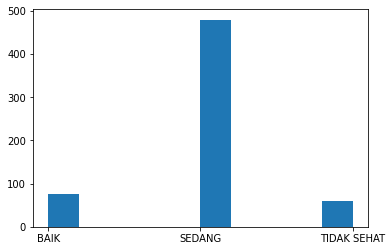

In [231]:
#visualisasi label categori dengan histogram
plt.hist(y['categori'])

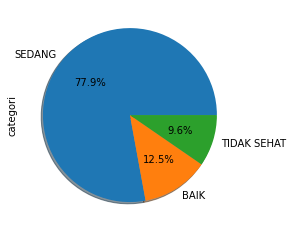

In [232]:
#visualisasi label categori dengan pie chart
y['categori'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

**Keterangan:** Data kategori imbalance (tidak seimbang) sehingga perlu dilakukan resampling (pengambilan sampel ulang)

In [240]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [241]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2)
X_sm, y_sm = smote.fit_resample(X, y)

print(Counter(y_sm))

Counter({'categori': 1})


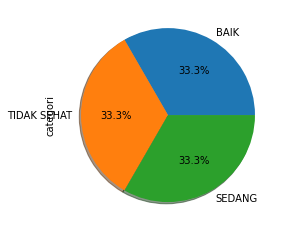

In [243]:
#visualisasi label categori dengan pie chart
y_sm['categori'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)